In [233]:
# import the necessary packages
import pandas as pd
import re 
import numpy as np
from scipy import stats
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
import seaborn as sns

In [234]:
# load the dataset
data = pd.read_csv('email.csv')

# check the first few rows
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [235]:
# map the labels to 0 and 1
data['Label'] = data['Category'].map({'ham': 0, 'spam': 1})

# check the first few rows
data.head()

,Category,Message,Label
0,ham,"Go until jurong point, crazy.. Available only ...",0.0
1,ham,Ok lar... Joking wif u oni...,0.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1.0
3,ham,U dun say so early hor... U c already then say...,0.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0.0


In [236]:
# check for any missing values
data.isnull().sum()

# drop the missing values
data = data.dropna()

# verify if there are any missing values
data.isnull().sum()

Category    0
Message     0
Label       0
dtype: int64

In [237]:
# preprocess the email text by removing special characters, numbers, and converting to lowercase
def preprocess(text):
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)
    text = text.lower()
    return text

data['Message'] = data['Message'].apply(preprocess)

# check the first few rows
data.head()

,Category,Message,Label
0,ham,go until jurong point crazy available only ...,0.0
1,ham,ok lar joking wif u oni,0.0
2,spam,free entry in a wkly comp to win fa cup fina...,1.0
3,ham,u dun say so early hor u c already then say,0.0
4,ham,nah i don t think he goes to usf he lives aro...,0.0


In [238]:
# do a feature extraction using TF-IDF
vectorizer = TfidfVectorizer(
    ngram_range=(1, 3),    # Include phrases up to 3 words
    max_features=1000,     # Limit features
    min_df=2,             # Remove rare terms
    max_df=0.95,          # Remove too common terms
    stop_words='english'
)

matrix = vectorizer.fit_transform(data['Message'])
feature_names = vectorizer.get_feature_names_out()


In [239]:
# separate spam and ham emails
spam_texts = matrix[data['Label'] == 1]
ham_texts = matrix[data['Label'] == 0]

# calculate the spam significance score
spam_scores = np.mean(spam_texts.toarray(), axis=0)
ham_scores = np.mean(ham_texts.toarray(), axis=0)

# calculate the importance ratio
importance = spam_scores / (ham_scores + 1e-10)

In [240]:
# select top 100 features
top_n = 100
top_indices = (-importance).argsort()[:top_n]
selected_features = feature_names[top_indices]

In [241]:
# Create pattern with word boundaries
pattern = r'\b(?:' + '|'.join(
    re.escape(feature) for feature in selected_features
) + r')\b'

pattern

'\\b(?:claim|prize|tone|ppm|pobox|ringtone|guaranteed|awarded|cs|tones|entry|http|collection|mob|optout|weekly|dating|unsubscribe|national|poly|valid|opt|quiz|dating\\ service|selected\\ receive|bonus|sae|national\\ rate|vouchers|winner|txt\\ word|operator|await\\ collection|chance\\ win|free\\ text|gbp|txt\\ stop|freemsg|hl|prize\\ guaranteed|mobileupd|wkly|charged|urgent\\ mobile|txts|cash\\ prize|free\\ entry|prize\\ claim|ur\\ awarded|camcorder|reveal|valid\\ hrs|attempt\\ contact|just\\ min|wap|sk|nd\\ attempt|land\\ line|land|mobiles|ac|sms\\ ac|expires|http\\ www|savamob|claim\\ ur|double\\ mins|ipod|ur\\ mobile|reward|reply\\ stop|won\\ guaranteed|holiday\\ cash|ur\\ mob|mobileupd\\ optout|camcorder\\ reply|private\\ account\\ statement|private\\ account|account\\ statement|identifier\\ code|identifier|new\\ nokia|std|mobile\\ free|complimentary|admirer|secret\\ admirer|wq|dogging|stop\\ texts|tried\\ contact|guaranteed\\ cash|ringtones|suite\\ lands|suite\\ lands\\ row|lands\\

In [242]:
# Make predictions with threshold
def predict_spam(text, pattern, threshold=0.1):
    matches = len(re.findall(pattern, text, re.IGNORECASE))
    return matches >= threshold

# Make predictions
predictions = [
    predict_spam(text, pattern) 
    for text in data['Message']
]

predictions[:10]

[False, False, True, False, False, True, False, False, True, True]

<Axes: >

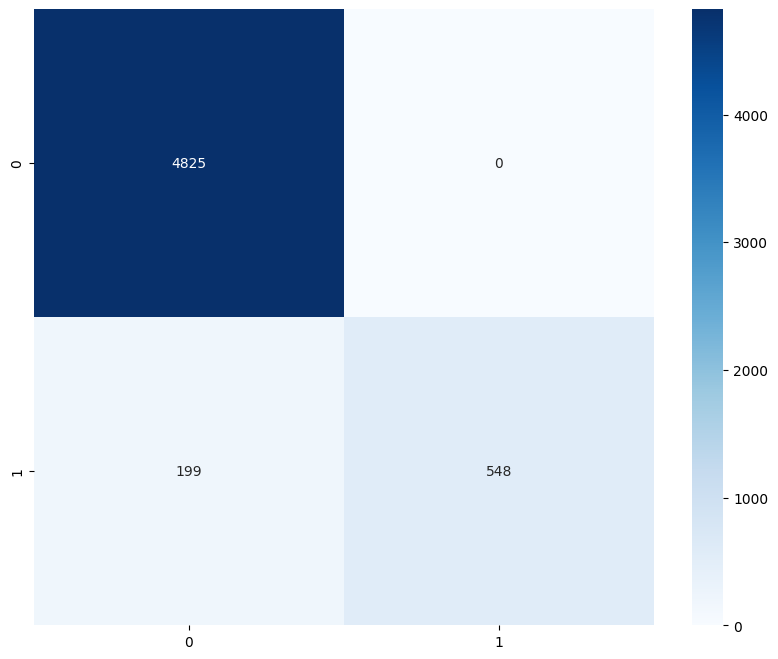

In [243]:
# plot the confusion matrix
conf_m= confusion_matrix(data['Label'], predictions)
plt.figure(figsize=(10,8))
sns.heatmap(conf_m, annot=True, fmt='d', cmap='Blues')


In [244]:
# calculate the precision, recall, and F1 score
precision = precision_score(data['Label'], predictions)
recall = recall_score(data['Label'], predictions)
f1 = f1_score(data['Label'], predictions)

# calculate the accuracy
accuracy = accuracy_score(data['Label'], predictions)

# print the metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Accuracy: {accuracy:.2f}')


Precision: 1.00
Recall: 0.73
F1 Score: 0.85
Accuracy: 0.96


### NAIVE BAYES ALGORITHM

In [245]:
data['spam']=data['Category'].apply(lambda x: 1 if x=='spam' else 0)


# split the data into training and testing sets
X=data['Message']
Y=data['spam']

X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [246]:
#Defineing Naive Baised
clf_NaiveBaised= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nd', MultinomialNB())
])

#Fiting the algorithm
clf_NaiveBaised.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nd', MultinomialNB())])

In [247]:
#Make prediction on X_test
y_pred_NB=clf_NaiveBaised.predict(X_test)

In [248]:
# calculate the precision, recall, and F1 score
precision = precision_score(y_test, y_pred_NB)
recall = recall_score(y_test, y_pred_NB)
f1 = f1_score(y_test, y_pred_NB)

# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_NB)

# print the metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Accuracy: {accuracy:.2f}')


Precision: 0.95
Recall: 0.91
F1 Score: 0.93
Accuracy: 0.98


### K Nearest Neighbor Classifier

In [249]:
clf_knn= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

clf_knn.fit(X_train,y_train)

y_pred_KNN=clf_knn.predict(X_test)

In [250]:
# calculate the precision, recall, and F1 score
precision = precision_score(y_test, y_pred_KNN)
recall = recall_score(y_test, y_pred_KNN)
f1 = f1_score(y_test, y_pred_KNN)

# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_KNN)

# print the metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Accuracy: {accuracy:.2f}')

Precision: 0.99
Recall: 0.49
F1 Score: 0.66
Accuracy: 0.93


### RANDOM FOREST CLASSIFIER

In [251]:
clf_rf= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('rf', RandomForestClassifier(n_estimators=100))
])

clf_rf.fit(X_train,y_train)

y_pred_RF=clf_rf.predict(X_test)

In [252]:
# calculate the precision, recall, and F1 score
precision = precision_score(y_test, y_pred_RF)
recall = recall_score(y_test, y_pred_RF)
f1 = f1_score(y_test, y_pred_RF)

# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_RF)

# print the metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Accuracy: {accuracy:.2f}')



Precision: 1.00
Recall: 0.82
F1 Score: 0.90
Accuracy: 0.97


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

def compare_model_performances(X, y, models, pattern, cv=5):
    """Compare performance of multiple models and regex pattern"""
    
    # Define scoring metrics
    scoring = {
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1'
    }

    # Store results
    results = {}
    
    # For each ML model
    for name, model in models.items():
        # Get cross validation scores
        scores = cross_validate(model, X, y, scoring=scoring, cv=cv)
        results[name] = {
            'accuracy': scores['test_accuracy'].mean(),
            'precision': scores['test_precision'].mean(), 
            'recall': scores['test_recall'].mean(),
            'f1': scores['test_f1'].mean()
        }
    
    # For regex pattern
    regex_preds = [predict_spam(text, pattern) for text in X]
    results['Regex Pattern'] = {
        'accuracy': accuracy_score(y, regex_preds),
        'precision': precision_score(y, regex_preds),
        'recall': recall_score(y, regex_preds),
        'f1': f1_score(y, regex_preds)
    }
    
    return pd.DataFrame(results).T

def plot_model_comparison(results):
    """Plot performance comparison"""
    
    # Set up the plot style
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Model Performance Comparison', fontsize=16)
    
    # Plot each metric
    metrics = ['accuracy', 'precision', 'recall', 'f1']
    for ax, metric in zip(axes.flat, metrics):
        sns.barplot(x=results.index, y=results[metric], ax=ax)
        ax.set_title(f'{metric.capitalize()} Score')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        ax.set_ylim(0, 1)
    
    plt.tight_layout()
    return plt

# Usage:
models = {
    'Naive Bayes': clf_NaiveBaised,
    'KNN': clf_knn,
    'Random Forest': clf_rf
}

# Compare performances
results = compare_model_performances(X, Y, models, pattern)

# Display results table
print("\nModel Performance Metrics:")
print(results.round(3))

# Plot comparison
plot_model_comparison(results)
plt.show()
